In [1]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from src.conditional_normalizing_flow import ConditionalNormalizingFlow

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
plt.style.use('dark_background')

In [3]:
# data loading
data_path = "./input_data/"

#outerdata_train = np.load(join(data_path, "outerdata_train.npy"))
#outerdata_val = np.load(join(data_path, "outerdata_val.npy"))
#innerdata_test = np.load(join(data_path, "innerdata_test.npy"))

FileNotFoundError: [Errno 2] No such file or directory: './input_data/outerdata_train.npy'

In [12]:
# some data preprocessing functions
def logit_transform(x, min_vals, max_vals):
    with np.errstate(divide='ignore', invalid='ignore'):
        x_norm = (x - min_vals) / (max_vals - min_vals)
        logit = np.log(x_norm / (1 - x_norm))
    domain_mask = ~(np.isnan(logit).any(axis=1) | np.isinf(logit).any(axis=1))
    return logit, domain_mask

def standardize(x, mean, std):
    return (x - mean) / std

def inverse_logit_transform(x, min_vals, max_vals):
    x_norm = 1 / (1 + np.exp(-x))
    return x_norm * (max_vals - min_vals) + min_vals

def inverse_standardize(x, mean, std):
    return x * std + mean

In [13]:
# data preprocessing

# the logit min/max and standard scaler parameters are derived on the outer train set
preprocessing_params = {}
preprocessing_params["min"] = np.min(outerdata_train[:, 1:-1], axis=0)
preprocessing_params["max"] = np.max(outerdata_train[:, 1:-1], axis=0)

preprocessed_outerdata_train_x, mask = logit_transform(outerdata_train[:, 1:-1], preprocessing_params["min"], preprocessing_params["max"])
preprocessed_outerdata_train = np.hstack([outerdata_train[:, 0:1], preprocessed_outerdata_train_x, outerdata_train[:, -1:]])[mask]

preprocessing_params["mean"] = np.mean(preprocessed_outerdata_train[:, 1:-1], axis=0)
preprocessing_params["std"] = np.std(preprocessed_outerdata_train[:, 1:-1], axis=0)
preprocessed_outerdata_train[:, 1:-1] = standardize(preprocessed_outerdata_train[:, 1:-1], preprocessing_params["mean"], preprocessing_params["std"])

# outer validation set if one wants to train a new flow
preprocessed_outerdata_val_x, mask = logit_transform(outerdata_val[:, 1:-1], preprocessing_params["min"], preprocessing_params["max"])
preprocessed_outerdata_val = np.hstack([outerdata_val[:, 0:1], preprocessed_outerdata_val_x, outerdata_val[:, -1:]])[mask]
preprocessed_outerdata_val[:, 1:-1] = standardize(preprocessed_outerdata_val[:, 1:-1], preprocessing_params["mean"], preprocessing_params["std"])

# inner test set to evaluate inner log likelihood
preprocessed_innerdata_test_x, mask = logit_transform(innerdata_test[:, 1:-1], preprocessing_params["min"], preprocessing_params["max"])
preprocessed_innerdata_test = np.hstack([innerdata_test[:, 0:1], preprocessed_innerdata_test_x, innerdata_test[:, -1:]])[mask]
preprocessed_innerdata_test[:, 1:-1] = standardize(preprocessed_innerdata_test[:, 1:-1], preprocessing_params["mean"], preprocessing_params["std"])

In [28]:
# either train new flow model from scratch
m_train = preprocessed_outerdata_train[:, 0]
x_train = preprocessed_outerdata_train[:, 1:-1]
m_val = preprocessed_outerdata_val[:, 0]
x_val = preprocessed_outerdata_val[:, 1:-1]

flow_savedir = "./trained_flows_sklearn_new/"
model = ConditionalNormalizingFlow(save_path=flow_savedir)
model.fit(m_train, x_train, m_val, x_val, epochs=100, verbose=True)

ConditionalNormalizingFlow has 274800 parameters
n_nans = 0
n_highs = 0
n_nans = 0
n_highs = 0

Epoch: 0


Train, Log likelihood in nats: -5.351633: 100%|██████████| 439060/439060 [01:43<00:00, 4256.40it/s]


n_nans = 0
n_highs = 0
train_loss =  5.351611788407635
val_loss =  5.345894036284708

Epoch: 1


Train, Log likelihood in nats: -5.329453: 100%|██████████| 439060/439060 [01:44<00:00, 4197.15it/s]


n_nans = 0
n_highs = 0
train_loss =  5.329480507728077
val_loss =  5.3403725324500915

Epoch: 2


Train, Log likelihood in nats: -5.325919: 100%|██████████| 439060/439060 [01:42<00:00, 4289.69it/s]


n_nans = 0
n_highs = 0
train_loss =  5.325869855921789
val_loss =  5.338907662902619

Epoch: 3


Train, Log likelihood in nats: -5.324226: 100%|██████████| 439060/439060 [01:48<00:00, 4058.13it/s]


n_nans = 0
n_highs = 0
train_loss =  5.324628992570601
val_loss =  5.3362204608284785

Epoch: 4


Train, Log likelihood in nats: -5.322686: 100%|██████████| 439060/439060 [01:42<00:00, 4273.37it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3228726786236304
val_loss =  5.336001561782331

Epoch: 5


Train, Log likelihood in nats: -5.322515: 100%|██████████| 439060/439060 [01:43<00:00, 4245.37it/s]


n_nans = 0
n_highs = 0
train_loss =  5.322470932629572
val_loss =  5.334762978512163

Epoch: 6


Train, Log likelihood in nats: -5.321858: 100%|██████████| 439060/439060 [01:45<00:00, 4176.33it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3219703834089325
val_loss =  5.336403830097192

Epoch: 7


Train, Log likelihood in nats: -5.320693: 100%|██████████| 439060/439060 [01:40<00:00, 4366.06it/s]


n_nans = 0
n_highs = 0
train_loss =  5.321033416955676
val_loss =  5.333921643035782

Epoch: 8


Train, Log likelihood in nats: -5.320272: 100%|██████████| 439060/439060 [01:44<00:00, 4203.11it/s]


n_nans = 0
n_highs = 0
train_loss =  5.320425560654896
val_loss =  5.334203406362217

Epoch: 9


Train, Log likelihood in nats: -5.319990: 100%|██████████| 439060/439060 [01:47<00:00, 4098.77it/s]


n_nans = 0
n_highs = 0
train_loss =  5.32016063851821
val_loss =  5.334658547013634

Epoch: 10


Train, Log likelihood in nats: -5.319584: 100%|██████████| 439060/439060 [01:45<00:00, 4160.65it/s]


n_nans = 0
n_highs = 0
train_loss =  5.31964255050663
val_loss =  5.3328991560411705

Epoch: 11


Train, Log likelihood in nats: -5.319284: 100%|██████████| 439060/439060 [01:45<00:00, 4171.23it/s]


n_nans = 0
n_highs = 0
train_loss =  5.319257288279307
val_loss =  5.332317709298658

Epoch: 12


Train, Log likelihood in nats: -5.318105: 100%|██████████| 439060/439060 [01:45<00:00, 4156.94it/s]


n_nans = 0
n_highs = 0
train_loss =  5.318279819004043
val_loss =  5.334638811114779

Epoch: 13


Train, Log likelihood in nats: -5.318101: 100%|██████████| 439060/439060 [01:44<00:00, 4207.55it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3181842756755735
val_loss =  5.3329136217659885

Epoch: 14


Train, Log likelihood in nats: -5.317685: 100%|██████████| 439060/439060 [01:45<00:00, 4153.17it/s]


n_nans = 0
n_highs = 0
train_loss =  5.31792519640196
val_loss =  5.3322769983900775

Epoch: 15


Train, Log likelihood in nats: -5.317395: 100%|██████████| 439060/439060 [01:45<00:00, 4161.28it/s]


n_nans = 0
n_highs = 0
train_loss =  5.317552018994781
val_loss =  5.33336117962476

Epoch: 16


Train, Log likelihood in nats: -5.317602: 100%|██████████| 439060/439060 [01:43<00:00, 4236.37it/s]


n_nans = 0
n_highs = 0
train_loss =  5.317595142995731
val_loss =  5.334147640547827

Epoch: 17


Train, Log likelihood in nats: -5.317496: 100%|██████████| 439060/439060 [01:44<00:00, 4189.61it/s]


n_nans = 0
n_highs = 0
train_loss =  5.317320338312284
val_loss =  5.331928140829995

Epoch: 18


Train, Log likelihood in nats: -5.316771: 100%|██████████| 439060/439060 [01:48<00:00, 4037.80it/s]


n_nans = 0
n_highs = 0
train_loss =  5.316953583439841
val_loss =  5.332362652657127

Epoch: 19


Train, Log likelihood in nats: -5.316847: 100%|██████████| 439060/439060 [01:45<00:00, 4144.12it/s]


n_nans = 0
n_highs = 0
train_loss =  5.316874223381969
val_loss =  5.333358251195511

Epoch: 20


Train, Log likelihood in nats: -5.316284: 100%|██████████| 439060/439060 [01:45<00:00, 4161.06it/s]


n_nans = 0
n_highs = 0
train_loss =  5.316612651896239
val_loss =  5.332568409139157

Epoch: 21


Train, Log likelihood in nats: -5.315738: 100%|██████████| 439060/439060 [01:40<00:00, 4390.17it/s]


n_nans = 0
n_highs = 0
train_loss =  5.315719345017445
val_loss =  5.332098945897287

Epoch: 22


Train, Log likelihood in nats: -5.316057: 100%|██████████| 439060/439060 [01:40<00:00, 4348.60it/s]


n_nans = 0
n_highs = 0
train_loss =  5.315990339502009
val_loss =  5.332001468898114

Epoch: 23


Train, Log likelihood in nats: -5.316181: 100%|██████████| 439060/439060 [01:39<00:00, 4396.39it/s]


n_nans = 0
n_highs = 0
train_loss =  5.316037667337944
val_loss =  5.332072219715484

Epoch: 24


Train, Log likelihood in nats: -5.315139: 100%|██████████| 439060/439060 [01:41<00:00, 4335.07it/s]


n_nans = 0
n_highs = 0
train_loss =  5.315325298903608
val_loss =  5.332378051251849

Epoch: 25


Train, Log likelihood in nats: -5.314620: 100%|██████████| 439060/439060 [01:45<00:00, 4176.57it/s]


n_nans = 0
n_highs = 0
train_loss =  5.314918106886942
val_loss =  5.333913679106281

Epoch: 26


Train, Log likelihood in nats: -5.314920: 100%|██████████| 439060/439060 [01:45<00:00, 4159.84it/s]


n_nans = 0
n_highs = 0
train_loss =  5.314775448925418
val_loss =  5.331909604929713

Epoch: 27


Train, Log likelihood in nats: -5.314658: 100%|██████████| 439060/439060 [01:45<00:00, 4169.13it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3146007518803495
val_loss =  5.332430544115902

Epoch: 28


Train, Log likelihood in nats: -5.314683: 100%|██████████| 439060/439060 [01:45<00:00, 4146.49it/s]


n_nans = 0
n_highs = 0
train_loss =  5.314829193293541
val_loss =  5.332248512154891

Epoch: 29


Train, Log likelihood in nats: -5.314271: 100%|██████████| 439060/439060 [01:45<00:00, 4156.62it/s]


n_nans = 0
n_highs = 0
train_loss =  5.314265539625188
val_loss =  5.33195772720257

Epoch: 30


Train, Log likelihood in nats: -5.314089: 100%|██████████| 439060/439060 [01:46<00:00, 4110.19it/s]


n_nans = 0
n_highs = 0
train_loss =  5.314397193762359
val_loss =  5.332436316092393

Epoch: 31


Train, Log likelihood in nats: -5.313668: 100%|██████████| 439060/439060 [01:46<00:00, 4108.68it/s]


n_nans = 0
n_highs = 0
train_loss =  5.313884782909517
val_loss =  5.3311291356777435

Epoch: 32


Train, Log likelihood in nats: -5.314299: 100%|██████████| 439060/439060 [01:52<00:00, 3909.04it/s]


n_nans = 0
n_highs = 0
train_loss =  5.314079153453039
val_loss =  5.3319088942509465

Epoch: 33


Train, Log likelihood in nats: -5.313519: 100%|██████████| 439060/439060 [01:53<00:00, 3872.70it/s]


n_nans = 0
n_highs = 0
train_loss =  5.313470982950282
val_loss =  5.332266395628764

Epoch: 34


Train, Log likelihood in nats: -5.313109: 100%|██████████| 439060/439060 [01:49<00:00, 4003.45it/s]


n_nans = 0
n_highs = 0
train_loss =  5.313483204603988
val_loss =  5.331894549191726

Epoch: 35


Train, Log likelihood in nats: -5.313240: 100%|██████████| 439060/439060 [01:49<00:00, 4018.21it/s]


n_nans = 0
n_highs = 0
train_loss =  5.313242901863772
val_loss =  5.332228517449131

Epoch: 36


Train, Log likelihood in nats: -5.312995: 100%|██████████| 439060/439060 [01:46<00:00, 4128.16it/s]


n_nans = 0
n_highs = 0
train_loss =  5.313075445651117
val_loss =  5.333141021495506

Epoch: 37


Train, Log likelihood in nats: -5.312282: 100%|██████████| 439060/439060 [01:45<00:00, 4157.47it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3128839793099045
val_loss =  5.3312944758416885

Epoch: 38


Train, Log likelihood in nats: -5.312674: 100%|██████████| 439060/439060 [01:46<00:00, 4131.27it/s]


n_nans = 0
n_highs = 0
train_loss =  5.312843101934622
val_loss =  5.331052211774789

Epoch: 39


Train, Log likelihood in nats: -5.312327: 100%|██████████| 439060/439060 [01:46<00:00, 4108.56it/s]


n_nans = 0
n_highs = 0
train_loss =  5.312474144896858
val_loss =  5.332197227611176

Epoch: 40


Train, Log likelihood in nats: -5.312205: 100%|██████████| 439060/439060 [01:48<00:00, 4044.05it/s]


n_nans = 0
n_highs = 0
train_loss =  5.31256386677844
val_loss =  5.330566742449323

Epoch: 41


Train, Log likelihood in nats: -5.312314: 100%|██████████| 439060/439060 [01:53<00:00, 3874.34it/s]


n_nans = 0
n_highs = 0
train_loss =  5.312290408836326
val_loss =  5.332225311072917

Epoch: 42


Train, Log likelihood in nats: -5.311699: 100%|██████████| 439060/439060 [01:51<00:00, 3930.11it/s]


n_nans = 0
n_highs = 0
train_loss =  5.311732187310433
val_loss =  5.332500526002148

Epoch: 43


Train, Log likelihood in nats: -5.311517: 100%|██████████| 439060/439060 [01:49<00:00, 4007.37it/s]


n_nans = 0
n_highs = 0
train_loss =  5.31168012216043
val_loss =  5.332506859697805

Epoch: 44


Train, Log likelihood in nats: -5.311533: 100%|██████████| 439060/439060 [01:47<00:00, 4078.19it/s]


n_nans = 0
n_highs = 0
train_loss =  5.311562013480569
val_loss =  5.331789243907829

Epoch: 45


Train, Log likelihood in nats: -5.310853: 100%|██████████| 439060/439060 [01:50<00:00, 3973.56it/s]


n_nans = 0
n_highs = 0
train_loss =  5.310802002627665
val_loss =  5.33182748824514

Epoch: 46


Train, Log likelihood in nats: -5.311587: 100%|██████████| 439060/439060 [01:45<00:00, 4160.36it/s]


n_nans = 0
n_highs = 0
train_loss =  5.311399297792863
val_loss =  5.3322145435406485

Epoch: 47


Train, Log likelihood in nats: -5.310662: 100%|██████████| 439060/439060 [01:51<00:00, 3923.97it/s]


n_nans = 0
n_highs = 0
train_loss =  5.310480988005031
val_loss =  5.332616794379802

Epoch: 48


Train, Log likelihood in nats: -5.310454: 100%|██████████| 439060/439060 [01:50<00:00, 3981.34it/s]


n_nans = 0
n_highs = 0
train_loss =  5.310317857499623
val_loss =  5.334054395998543

Epoch: 49


Train, Log likelihood in nats: -5.310451: 100%|██████████| 439060/439060 [01:48<00:00, 4054.69it/s]


n_nans = 0
n_highs = 0
train_loss =  5.310769565741967
val_loss =  5.3317800134056315

Epoch: 50


Train, Log likelihood in nats: -5.310976: 100%|██████████| 439060/439060 [01:49<00:00, 3997.49it/s]


n_nans = 0
n_highs = 0
train_loss =  5.310821254210597
val_loss =  5.331603788372526

Epoch: 51


Train, Log likelihood in nats: -5.310177: 100%|██████████| 439060/439060 [01:48<00:00, 4059.92it/s]


n_nans = 0
n_highs = 0
train_loss =  5.310393139230294
val_loss =  5.3312564478702775

Epoch: 52


Train, Log likelihood in nats: -5.309725: 100%|██████████| 439060/439060 [01:48<00:00, 4036.53it/s]


n_nans = 0
n_highs = 0
train_loss =  5.310115934886058
val_loss =  5.3320871165077515

Epoch: 53


Train, Log likelihood in nats: -5.310261: 100%|██████████| 439060/439060 [01:52<00:00, 3919.78it/s]


n_nans = 0
n_highs = 0
train_loss =  5.310309631923975
val_loss =  5.3319434944871835

Epoch: 54


Train, Log likelihood in nats: -5.309586: 100%|██████████| 439060/439060 [01:48<00:00, 4032.58it/s]


n_nans = 0
n_highs = 0
train_loss =  5.30979210022386
val_loss =  5.332623237090585

Epoch: 55


Train, Log likelihood in nats: -5.309426: 100%|██████████| 439060/439060 [01:49<00:00, 4010.00it/s]


n_nans = 0
n_highs = 0
train_loss =  5.309415764115326
val_loss =  5.3322274431092165

Epoch: 56


Train, Log likelihood in nats: -5.308526: 100%|██████████| 439060/439060 [01:50<00:00, 3982.34it/s]


n_nans = 0
n_highs = 0
train_loss =  5.30897851254312
val_loss =  5.333204775372517

Epoch: 57


Train, Log likelihood in nats: -5.308863: 100%|██████████| 439060/439060 [01:48<00:00, 4032.92it/s]


n_nans = 0
n_highs = 0
train_loss =  5.308782563043152
val_loss =  5.332025502988805

Epoch: 58


Train, Log likelihood in nats: -5.308258: 100%|██████████| 439060/439060 [01:50<00:00, 3986.01it/s]


n_nans = 0
n_highs = 0
train_loss =  5.308434783322542
val_loss =  5.331766185960221

Epoch: 59


Train, Log likelihood in nats: -5.308153: 100%|██████████| 439060/439060 [01:50<00:00, 3961.35it/s]


n_nans = 0
n_highs = 0
train_loss =  5.308321821650508
val_loss =  5.331539671666543

Epoch: 60


Train, Log likelihood in nats: -5.308261: 100%|██████████| 439060/439060 [01:49<00:00, 4007.87it/s]


n_nans = 0
n_highs = 0
train_loss =  5.308305716571062
val_loss =  5.3312471599479

Epoch: 61


Train, Log likelihood in nats: -5.308530: 100%|██████████| 439060/439060 [01:51<00:00, 3928.88it/s]


n_nans = 0
n_highs = 0
train_loss =  5.308291194641264
val_loss =  5.33230432373899

Epoch: 62


Train, Log likelihood in nats: -5.308201: 100%|██████████| 439060/439060 [01:48<00:00, 4039.12it/s]


n_nans = 0
n_highs = 0
train_loss =  5.308228105749459
val_loss =  5.331681340568768

Epoch: 63


Train, Log likelihood in nats: -5.308015: 100%|██████████| 439060/439060 [01:48<00:00, 4045.41it/s]


n_nans = 0
n_highs = 0
train_loss =  5.307801731798213
val_loss =  5.331889318962164

Epoch: 64


Train, Log likelihood in nats: -5.307507: 100%|██████████| 439060/439060 [01:47<00:00, 4103.30it/s]


n_nans = 0
n_highs = 0
train_loss =  5.307457569093686
val_loss =  5.332667133570966

Epoch: 65


Train, Log likelihood in nats: -5.307588: 100%|██████████| 439060/439060 [01:51<00:00, 3948.28it/s]


n_nans = 0
n_highs = 0
train_loss =  5.307425261613574
val_loss =  5.332843261239416

Epoch: 66


Train, Log likelihood in nats: -5.307161: 100%|██████████| 439060/439060 [01:47<00:00, 4079.61it/s]


n_nans = 0
n_highs = 0
train_loss =  5.307280635053963
val_loss =  5.332107098730863

Epoch: 67


Train, Log likelihood in nats: -5.306491: 100%|██████████| 439060/439060 [01:46<00:00, 4117.16it/s]


n_nans = 0
n_highs = 0
train_loss =  5.306677770705852
val_loss =  5.331861577524981

Epoch: 68


Train, Log likelihood in nats: -5.306917: 100%|██████████| 439060/439060 [01:54<00:00, 3817.96it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3069371412670625
val_loss =  5.332796671003571

Epoch: 69


Train, Log likelihood in nats: -5.306914: 100%|██████████| 439060/439060 [01:51<00:00, 3944.48it/s]


n_nans = 0
n_highs = 0
train_loss =  5.307020904372418
val_loss =  5.331973858944824

Epoch: 70


Train, Log likelihood in nats: -5.306730: 100%|██████████| 439060/439060 [01:50<00:00, 3969.68it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3067657034739115
val_loss =  5.331792764846775

Epoch: 71


Train, Log likelihood in nats: -5.306555: 100%|██████████| 439060/439060 [01:50<00:00, 3968.83it/s]


n_nans = 0
n_highs = 0
train_loss =  5.306577074515794
val_loss =  5.33239338992986

Epoch: 72


Train, Log likelihood in nats: -5.306012: 100%|██████████| 439060/439060 [01:53<00:00, 3868.02it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3062698042089185
val_loss =  5.332608548342454

Epoch: 73


Train, Log likelihood in nats: -5.306089: 100%|██████████| 439060/439060 [01:51<00:00, 3941.71it/s]


n_nans = 0
n_highs = 0
train_loss =  5.305914233811802
val_loss =  5.331251199332831

Epoch: 74


Train, Log likelihood in nats: -5.305763: 100%|██████████| 439060/439060 [01:52<00:00, 3892.65it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3058564664926235
val_loss =  5.331743914419444

Epoch: 75


Train, Log likelihood in nats: -5.305664: 100%|██████████| 439060/439060 [01:51<00:00, 3948.34it/s]


n_nans = 0
n_highs = 0
train_loss =  5.305679404636193
val_loss =  5.332065350930312

Epoch: 76


Train, Log likelihood in nats: -5.305730: 100%|██████████| 439060/439060 [01:52<00:00, 3895.52it/s]


n_nans = 0
n_highs = 0
train_loss =  5.305544977100032
val_loss =  5.332915378490668

Epoch: 77


Train, Log likelihood in nats: -5.305459: 100%|██████████| 439060/439060 [01:52<00:00, 3886.56it/s]


n_nans = 0
n_highs = 0
train_loss =  5.305212195298723
val_loss =  5.33269440066752

Epoch: 78


Train, Log likelihood in nats: -5.305331: 100%|██████████| 439060/439060 [01:48<00:00, 4043.18it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3054678490491725
val_loss =  5.330837801488906

Epoch: 79


Train, Log likelihood in nats: -5.304807: 100%|██████████| 439060/439060 [01:51<00:00, 3945.70it/s]


n_nans = 0
n_highs = 0
train_loss =  5.305185969565629
val_loss =  5.332727515468631

Epoch: 80


Train, Log likelihood in nats: -5.305014: 100%|██████████| 439060/439060 [01:49<00:00, 4000.23it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3050915254724655
val_loss =  5.334601393960949

Epoch: 81


Train, Log likelihood in nats: -5.304852: 100%|██████████| 439060/439060 [01:54<00:00, 3847.52it/s]


n_nans = 0
n_highs = 0
train_loss =  5.305033320329436
val_loss =  5.331799546253411

Epoch: 82


Train, Log likelihood in nats: -5.304782: 100%|██████████| 439060/439060 [01:54<00:00, 3832.03it/s]


n_nans = 0
n_highs = 0
train_loss =  5.304814069959529
val_loss =  5.332616740288326

Epoch: 83


Train, Log likelihood in nats: -5.304440: 100%|██████████| 439060/439060 [01:49<00:00, 3991.48it/s]


n_nans = 0
n_highs = 0
train_loss =  5.304592490836992
val_loss =  5.33074915554719

Epoch: 84


Train, Log likelihood in nats: -5.303927: 100%|██████████| 439060/439060 [01:54<00:00, 3824.13it/s]


n_nans = 0
n_highs = 0
train_loss =  5.304016082672271
val_loss =  5.331399996659311

Epoch: 85


Train, Log likelihood in nats: -5.303993: 100%|██████████| 439060/439060 [01:53<00:00, 3859.96it/s]


n_nans = 0
n_highs = 0
train_loss =  5.304039053619247
val_loss =  5.33253914315455

Epoch: 86


Train, Log likelihood in nats: -5.303502: 100%|██████████| 439060/439060 [01:48<00:00, 4053.08it/s]


n_nans = 0
n_highs = 0
train_loss =  5.30398076346636
val_loss =  5.33142468567294

Epoch: 87


Train, Log likelihood in nats: -5.303533: 100%|██████████| 439060/439060 [01:48<00:00, 4044.59it/s]


n_nans = 0
n_highs = 0
train_loss =  5.303907622572273
val_loss =  5.3334512161334775

Epoch: 88


Train, Log likelihood in nats: -5.303918: 100%|██████████| 439060/439060 [01:47<00:00, 4066.82it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3040167292722975
val_loss =  5.331154305689414

Epoch: 89


Train, Log likelihood in nats: -5.303633: 100%|██████████| 439060/439060 [01:47<00:00, 4088.97it/s]


n_nans = 0
n_highs = 0
train_loss =  5.303735813239612
val_loss =  5.332354616328268

Epoch: 90


Train, Log likelihood in nats: -5.303123: 100%|██████████| 439060/439060 [01:50<00:00, 3960.98it/s]


n_nans = 0
n_highs = 0
train_loss =  5.303407874153735
val_loss =  5.331785541554396

Epoch: 91


Train, Log likelihood in nats: -5.303061: 100%|██████████| 439060/439060 [01:49<00:00, 4005.48it/s]


n_nans = 0
n_highs = 0
train_loss =  5.303408116326215
val_loss =  5.332799566145758

Epoch: 92


Train, Log likelihood in nats: -5.303193: 100%|██████████| 439060/439060 [01:52<00:00, 3894.02it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3030798083502235
val_loss =  5.332603962217534

Epoch: 93


Train, Log likelihood in nats: -5.302761: 100%|██████████| 439060/439060 [01:50<00:00, 3958.79it/s]


n_nans = 0
n_highs = 0
train_loss =  5.303183306498348
val_loss =  5.331976842297726

Epoch: 94


Train, Log likelihood in nats: -5.302510: 100%|██████████| 439060/439060 [01:54<00:00, 3823.02it/s]


n_nans = 0
n_highs = 0
train_loss =  5.303088321813618
val_loss =  5.332861986043774

Epoch: 95


Train, Log likelihood in nats: -5.303160: 100%|██████████| 439060/439060 [01:53<00:00, 3852.45it/s]


n_nans = 0
n_highs = 0
train_loss =  5.303296625015214
val_loss =  5.33244280374071

Epoch: 96


Train, Log likelihood in nats: -5.303257: 100%|██████████| 439060/439060 [01:51<00:00, 3920.37it/s]


n_nans = 0
n_highs = 0
train_loss =  5.303225797064803
val_loss =  5.332321294315198

Epoch: 97


Train, Log likelihood in nats: -5.302342: 100%|██████████| 439060/439060 [01:48<00:00, 4029.97it/s]


n_nans = 0
n_highs = 0
train_loss =  5.302690158786087
val_loss =  5.3333921732078675

Epoch: 98


Train, Log likelihood in nats: -5.302598: 100%|██████████| 439060/439060 [01:50<00:00, 3985.12it/s]


n_nans = 0
n_highs = 0
train_loss =  5.3026646235127854
val_loss =  5.33171015801022

Epoch: 99


Train, Log likelihood in nats: -5.302471: 100%|██████████| 439060/439060 [01:49<00:00, 4009.11it/s]


n_nans = 0
n_highs = 0
train_loss =  5.30241605886342
val_loss =  5.333045075701169


In [29]:
# after training it still makes sense to go back to the optimal epoch checlpoint
model.load_best_model()

In [6]:
# or loading existing flow model
flow_savedir = "./trained_flows_sklearn/"
model = ConditionalNormalizingFlow(save_path=flow_savedir)
model.load_best_model()

ConditionalNormalizingFlow has 274800 parameters


In [30]:
# drawing samples at the same conditional values as the inner data (sanity check)
m_vals = preprocessed_innerdata_test[:, 0]
samples = model.sample(m_vals)

phyiscal_samples = inverse_standardize(samples, preprocessing_params["mean"], preprocessing_params["std"])
phyiscal_samples = inverse_logit_transform(phyiscal_samples, preprocessing_params["min"], preprocessing_params["max"])

phyiscal_samples = np.hstack([preprocessed_innerdata_test[:, 0:1], phyiscal_samples, phyiscal_samples[:, -1:]])

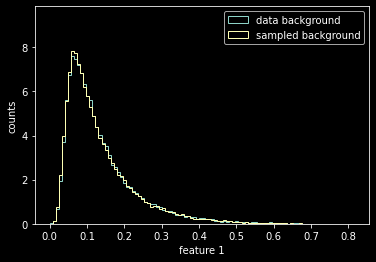

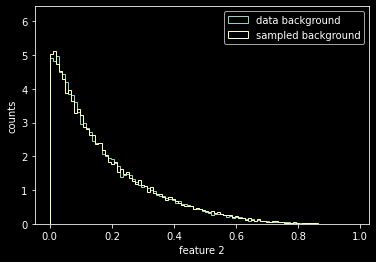

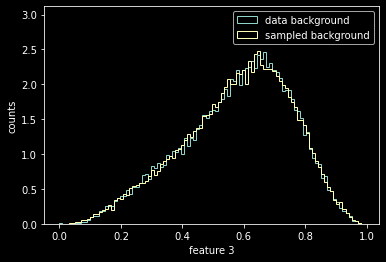

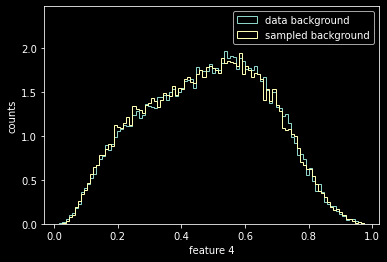

In [31]:
# comparing samples to inner background (sanity check)
for i in range(1, 5):
    _, binning, _ = plt.hist(innerdata_test[innerdata_test[:, -1] == 0, i], bins=100, label="data background", density=True, histtype="step")
    _ = plt.hist(phyiscal_samples[:, i], bins=binning, label="sampled background", density=True, histtype="step")
    plt.legend()
    plt.ylim(0, plt.gca().get_ylim()[1] * 1.2)
    plt.xlabel("feature {}".format(i))
    plt.ylabel("counts")
    plt.show()


In [32]:
# evaluate likelihood of inner data points
logit_log_prob = model.log_probs(
    preprocessed_innerdata_test[:, 0],
    preprocessed_innerdata_test[:, 1:-1]
)

# translating it to physical coordinates
log_prob = logit_log_prob + np.sum(
    np.log(
        2 * (1 + np.cosh(preprocessed_innerdata_test[:, 1:-1] * preprocessing_params["std"] + preprocessing_params["mean"]))
        / (preprocessing_params["std"] * (preprocessing_params["max"] - preprocessing_params["min"]))
    ), axis=1
)

In [33]:
print(log_prob)

[4.79555547 3.3325226  2.58020505 ... 3.83912673 3.29012089 3.36853826]
